---
title: "Comprehensive Study on the Impact of Feature Scaling on Classification Models"
author: "Sherry Thomas"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Colab Link: [Click here!](https://colab.research.google.com/drive/1O0kAoCd9q6RSzs_MeE6TNw50KZBL2Wmj?usp=sharing){target="_blank"}

## Introduction

In the realm of machine learning, feature scaling is a crucial preprocessing step that can significantly influence the performance of classification models. It involves transforming the data to a common scale, ensuring that no single feature dominates the learning process due to its range of values. This notebook presents an exhaustive exploration of the impact of various feature scaling methods on classification models. We will focus on five commonly used techniques:

1. Standard Scaler
2. Min-max Scaler
3. Maximum Absolute Scaler
4. Robust Scaler
5. Quantile Transformer

We will use four different datasets provided by scikit-learn, which are frequently employed for classification tasks:

1. Iris dataset
2. Digits dataset
3. Wine dataset
4. Breast Cancer dataset

## Importing Necessary Libraries

Before we begin, we need to import the required libraries for data manipulation, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading the Datasets

In this section, we will start by loading four distinct datasets, each with its unique characteristics. These datasets are commonly used for various classification tasks and will serve as the foundation for our comprehensive study on the impact of feature scaling on classification models.

In [2]:
# Load the datasets
iris = load_iris()
digits = load_digits()
wine = load_wine()
breast_cancer = load_breast_cancer()

# Create DataFrames for the datasets
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
digits_df = pd.DataFrame(data=np.c_[digits['data'], digits['target']], columns=digits['feature_names'] + ['target'])
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])
breast_cancer_df = pd.DataFrame(data=np.c_[breast_cancer['data'], breast_cancer['target']], columns=list(breast_cancer['feature_names']) + ['target'])

### 1. Iris Dataset

**Description:** The Iris dataset is a classic dataset in the field of machine learning and consists of 150 samples of iris flowers, each from one of three species: Iris setosa, Iris virginica, and Iris versicolor. There are four features—sepal length, sepal width, petal length, and petal width—measured in centimeters.

**Use Case:** This dataset is often used for practicing classification techniques, especially for building models to distinguish between the three iris species based on their feature measurements.

In [3]:
# Display the first few rows of iris dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 2. Digits Dataset

**Description:** The Digits dataset is a collection of 8x8 pixel images of handwritten digits (0 through 9). There are 1,797 samples, and each sample is an 8x8 image, resulting in 64 features. The goal is to correctly classify the digits based on these pixel values.

**Use Case:** This dataset is a fundamental resource for pattern recognition and is frequently used for exploring image classification and digit recognition algorithms.

### 3. Wine Dataset

**Description:** The Wine dataset comprises 178 samples of wine classified into three classes based on their cultivar. The dataset contains 13 feature variables, including measurements related to chemical composition, making it a valuable resource for wine classification tasks.

**Use Case:** Wine quality prediction and classification are common applications for this dataset, as it allows for distinguishing between different wine types.

In [4]:
# Display the first few rows of wine dataset
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


### 4. Breast Cancer Dataset

**Description:** The Breast Cancer dataset is used for breast cancer diagnosis. It includes 569 samples with 30 feature variables, primarily related to characteristics of cell nuclei present in breast cancer biopsies. The dataset is labeled to indicate whether a sample is benign or malignant.

**Use Case:** This dataset is often employed for building classification models to assist in the early detection of breast cancer, aiding in medical diagnosis.

In [5]:
# Display the first few rows of breast cancer dataset
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


The datasets contain various features related to their respective domains, with a 'target' column indicating the class labels.

## Data Preprocessing

Before we proceed with feature scaling, we need to split the data for each dataset into training and testing sets. Additionally, to make our study more robust and thorough, we will create noisy versions of the datasets by adding random noise to the feature values. These noisy datasets will introduce variations that can better showcase the effects of different scaling methods on classification model performance.

In [6]:
# Define a function to create noisy datasets
def create_noisy_dataset(dataset, noise_std=0.2, test_size=0.2, random_state=42):
    X = dataset.data
    y = dataset.target

    rng = np.random.default_rng(seed=random_state)
    noise = rng.normal(0, noise_std, size=X.shape)
    X_noisy = X + noise

    X_train_noisy, X_test_noisy, y_train, y_test = train_test_split(X_noisy, y, test_size=test_size, random_state=random_state)

    return X_train_noisy, X_test_noisy, y_train, y_test

# Create noisy datasets for all four datasets
X_train_iris_noisy, X_test_iris_noisy, y_train_iris, y_test_iris = create_noisy_dataset(iris)
X_train_digits_noisy, X_test_digits_noisy, y_train_digits, y_test_digits = create_noisy_dataset(digits)
X_train_wine_noisy, X_test_wine_noisy, y_train_wine, y_test_wine = create_noisy_dataset(wine)
X_train_breast_cancer_noisy, X_test_breast_cancer_noisy, y_train_breast_cancer, y_test_breast_cancer = create_noisy_dataset(breast_cancer)

## Feature Scaling Methods

### 1. Standard Scaler

The Standard Scaler ($SS$) transforms the data so that it has a mean ($\mu$) of 0 and a standard deviation ($\sigma$) of 1. This method assumes that the data is normally distributed. The transformation is given by:

$$
SS(x) = \frac{x - \mu}{\sigma}
$$

where $x$ is the original feature vector, $\mu$ is the mean of the feature vector, and $\sigma$ is the standard deviation of the feature vector.

In [7]:
# Define a function to apply Standard Scaler to a dataset
def apply_standard_scaler(X_train, X_test):
    standard_scaler = StandardScaler()
    X_train_scaled = standard_scaler.fit_transform(X_train)
    X_test_scaled = standard_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Apply Standard Scaler to all four datasets
X_train_iris_standard, X_test_iris_standard = apply_standard_scaler(X_train_iris_noisy, X_test_iris_noisy)
X_train_digits_standard, X_test_digits_standard = apply_standard_scaler(X_train_digits_noisy, X_test_digits_noisy)
X_train_wine_standard, X_test_wine_standard = apply_standard_scaler(X_train_wine_noisy, X_test_wine_noisy)
X_train_breast_cancer_standard, X_test_breast_cancer_standard = apply_standard_scaler(X_train_breast_cancer_noisy, X_test_breast_cancer_noisy)

### 2. Min-max Scaler

The Min-max Scaler ($MMS$) scales the data to a specific range, typically between 0 and 1. It is suitable for data that does not follow a normal distribution. The transformation is given by:

$$
MMS(x) = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

where $x$ is the original feature vector, $x_{min}$ is the smallest value in the feature vector, and $x_{max}$ is the largest value in the feature vector.

In [8]:
# Define a function to apply Min-max Scaler to a dataset
def apply_min_max_scaler(X_train, X_test):
    min_max_scaler = MinMaxScaler()
    X_train_scaled = min_max_scaler.fit_transform(X_train)
    X_test_scaled = min_max_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Apply Min-max Scaler to all four datasets
X_train_iris_minmax, X_test_iris_minmax = apply_min_max_scaler(X_train_iris_noisy, X_test_iris_noisy)
X_train_digits_minmax, X_test_digits_minmax = apply_min_max_scaler(X_train_digits_noisy, X_test_digits_noisy)
X_train_wine_minmax, X_test_wine_minmax = apply_min_max_scaler(X_train_wine_noisy, X_test_wine_noisy)
X_train_breast_cancer_minmax, X_test_breast_cancer_minmax = apply_min_max_scaler(X_train_breast_cancer_noisy, X_test_breast_cancer_noisy)

### 3. Maximum Absolute Scaler

The Maximum Absolute Scaler ($MAS$) scales the data based on the maximum absolute value, making the largest value in each feature equal to 1. It does not shift/center the data, and thus does not destroy any sparsity. The transformation is given by:

$$
MAS(x) = \frac{x}{|x_{max}|}
$$

where $x$ is the original feature vector, and $x_{max, abs}$ is the maximum absolute value in the feature vector.

In [9]:
# Define a function to apply Maximum Absolute Scaler to a dataset
def apply_max_abs_scaler(X_train, X_test):
    max_abs_scaler = MaxAbsScaler()
    X_train_scaled = max_abs_scaler.fit_transform(X_train)
    X_test_scaled = max_abs_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Apply Maximum Absolute Scaler to all four datasets
X_train_iris_maxabs, X_test_iris_maxabs = apply_max_abs_scaler(X_train_iris_noisy, X_test_iris_noisy)
X_train_digits_maxabs, X_test_digits_maxabs = apply_max_abs_scaler(X_train_digits_noisy, X_test_digits_noisy)
X_train_wine_maxabs, X_test_wine_maxabs = apply_max_abs_scaler(X_train_wine_noisy, X_test_wine_noisy)
X_train_breast_cancer_maxabs, X_test_breast_cancer_maxabs = apply_max_abs_scaler(X_train_breast_cancer_noisy, X_test_breast_cancer_noisy)

### 4. Robust Scaler

The Robust Scaler ($RS$) scales the data using the median ($Q_2$) and the interquartile range ($IQR$, $Q_3 - Q_1$), making it robust to outliers. The transformation is given by:

$$
RS(x) = \frac{x - Q_2}{IQR}
$$

where $x$ is the original feature vector, $Q_2$ is the median of the feature vector, and $IQR$ is the interquartile range of the feature vector.

In [10]:
# Define a function to apply Robust Scaler to a dataset
def apply_robust_scaler(X_train, X_test):
    robust_scaler = RobustScaler()
    X_train_scaled = robust_scaler.fit_transform(X_train)
    X_test_scaled = robust_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Apply Robust Scaler to all four datasets
X_train_iris_robust, X_test_iris_robust = apply_robust_scaler(X_train_iris_noisy, X_test_iris_noisy)
X_train_digits_robust, X_test_digits_robust = apply_robust_scaler(X_train_digits_noisy, X_test_digits_noisy)
X_train_wine_robust, X_test_wine_robust = apply_robust_scaler(X_train_wine_noisy, X_test_wine_noisy)
X_train_breast_cancer_robust, X_test_breast_cancer_robust = apply_robust_scaler(X_train_breast_cancer_noisy, X_test_breast_cancer_noisy)

### 5. Quantile Transformer

The Quantile Transformer ($QT$) applies a non-linear transformation to the data, mapping it to a uniform or normal distribution. This method can be helpful when the data is not normally distributed. It computes the cumulative distribution function (CDF) of the data to place each value within the range of the distribution. The transformation is given by:

$$
QT(x) = F^{-1}(F(x))
$$

where $F(x)$ is the cumulative distribution function of the data, and $F^{-1}$ is the inverse function of $F$.

In [ ]:
# Define a function to apply Quantile Transformer to a dataset
def apply_quantile_transformer(X_train, X_test):
    quantile_transformer = QuantileTransformer(output_distribution='normal')
    X_train_scaled = quantile_transformer.fit_transform(X_train)
    X_test_scaled = quantile_transformer.transform(X_test)
    return X_train_scaled, X_test_scaled

# Apply Quantile Transformer to all four datasets
X_train_iris_quantile, X_test_iris_quantile = apply_quantile_transformer(X_train_iris_noisy, X_test_iris_noisy)
X_train_digits_quantile, X_test_digits_quantile = apply_quantile_transformer(X_train_digits_noisy, X_test_digits_noisy)
X_train_wine_quantile, X_test_wine_quantile = apply_quantile_transformer(X_train_wine_noisy, X_test_wine_noisy)
X_train_breast_cancer_quantile, X_test_breast_cancer_quantile = apply_quantile_transformer(X_train_breast_cancer_noisy, X_test_breast_cancer_noisy)

## Classification Models

We will now compare the performance of six classification models on the different scaled datasets. The models we will use are:

1. Random Forest
2. Support Vector Machine (SVM)
3. Decision Tree
4. Naive Bayes (GaussianNB)
5. K-Nearest Neighbors (KNN)
6. Logistic Regression

For each scaling method, we will train and evaluate all six models for all four datasets.

In [ ]:
# Initialize the classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
lr_classifier = LogisticRegression()

# Lists to store accuracy scores
accuracy_scores = []

# Loop through each dataset and scaling method, and evaluate the models
datasets = [
    ("Iris", X_train_iris_noisy, X_test_iris_noisy, y_train_iris, y_test_iris),
    ("Digits", X_train_digits_noisy, X_test_digits_noisy, y_train_digits, y_test_digits),
    ("Wine", X_train_wine_noisy, X_test_wine_noisy, y_train_wine, y_test_wine),
    ("Breast Cancer", X_train_breast_cancer_noisy, X_test_breast_cancer_noisy, y_train_breast_cancer, y_test_breast_cancer)
]

scaling_methods = {
    "No Scaling": {
        "Iris": [X_train_iris_noisy, X_test_iris_noisy],
        "Digits": [X_train_digits_noisy, X_test_digits_noisy],
        "Wine": [X_train_wine_noisy, X_test_wine_noisy],
        "Breast Cancer": [X_train_breast_cancer_noisy, X_test_breast_cancer_noisy]
    },
    "Standard Scaler": {
        "Iris": [X_train_iris_standard, X_test_iris_standard],
        "Digits": [X_train_digits_standard, X_test_digits_standard],
        "Wine": [X_train_wine_standard, X_test_wine_standard],
        "Breast Cancer": [X_train_breast_cancer_standard, X_test_breast_cancer_standard]
    },
    "Min-max Scaler": {
        "Iris": [X_train_iris_minmax, X_test_iris_minmax],
        "Digits": [X_train_digits_minmax, X_test_digits_minmax],
        "Wine": [X_train_wine_minmax, X_test_wine_minmax],
        "Breast Cancer": [X_train_breast_cancer_minmax, X_test_breast_cancer_minmax]
    },
    "Maximum Absolute Scaler": {
        "Iris": [X_train_iris_maxabs, X_test_iris_maxabs],
        "Digits": [X_train_digits_maxabs, X_test_digits_maxabs],
        "Wine": [X_train_wine_maxabs, X_test_wine_maxabs],
        "Breast Cancer": [X_train_breast_cancer_maxabs, X_test_breast_cancer_maxabs]
    },
    "Robust Scaler": {
        "Iris": [X_train_iris_robust, X_test_iris_robust],
        "Digits": [X_train_digits_robust, X_test_digits_robust],
        "Wine": [X_train_wine_robust, X_test_wine_robust],
        "Breast Cancer": [X_train_breast_cancer_robust, X_test_breast_cancer_robust]
    },
    "Quantile Transformer": {
        "Iris": [X_train_iris_quantile, X_test_iris_quantile],
        "Digits": [X_train_digits_quantile, X_test_digits_quantile],
        "Wine": [X_train_wine_quantile, X_test_wine_quantile],
        "Breast Cancer": [X_train_breast_cancer_quantile, X_test_breast_cancer_quantile]
    }
}

# Loop through datasets and scaling methods
for dataset_name, X_train, X_test, y_train, y_test in datasets:
    for scaler_name, scaled_data in scaling_methods.items():
        X_train_scaled, X_test_scaled = scaled_data[dataset_name]

        # Train and evaluate all six models
        for classifier, classifier_name in zip([rf_classifier, svm_classifier, dt_classifier, nb_classifier, knn_classifier, lr_classifier], ["Random Forest", "SVM", "Decision Tree", "Naive Bayes", "K-Nearest Neighbors", "Logistic Regression"]):
            classifier.fit(X_train_scaled, y_train)
            predictions = classifier.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, predictions)
            accuracy_scores.append([dataset_name, scaler_name, classifier_name, accuracy])

## Results and Discussion

Let's analyze the results of our experiment and discuss the impact of different scaling methods on multiple classification models for each dataset.

In [13]:
# Create a DataFrame to display the results
results_df = pd.DataFrame(accuracy_scores, columns=['Dataset', 'Scaling Method', 'Classifier', 'Accuracy'])
results_df

# Create a new DataFrame to display the results
results_pivoted_df = results_df.pivot(index=['Dataset', 'Scaling Method'], columns='Classifier', values='Accuracy')
results_pivoted_df.reset_index(inplace=True)
results_pivoted_df.columns.name = None  # Remove the column name

# Fill any missing values with NaN (for clarity)
results_pivoted_df.fillna(value=np.nan, inplace=True)

results_pivoted_df

,Dataset,Scaling Method,Decision Tree,K-Nearest Neighbors,Logistic Regression,Naive Bayes,Random Forest,SVM
0,Breast Cancer,Maximum Absolute Scaler,0.938596,0.903509,0.929825,0.956140,0.964912,0.929825
1,Breast Cancer,Min-max Scaler,0.938596,0.912281,0.964912,0.956140,0.964912,0.956140
2,Breast Cancer,No Scaling,0.938596,0.956140,0.973684,0.956140,0.964912,0.947368
3,Breast Cancer,Quantile Transformer,0.938596,0.956140,0.964912,0.947368,0.964912,0.956140
4,Breast Cancer,Robust Scaler,0.938596,0.964912,0.964912,0.956140,0.964912,0.973684
5,Breast Cancer,Standard Scaler,0.938596,0.938596,0.964912,0.956140,0.964912,0.964912
6,Digits,Maximum Absolute Scaler,0.858333,0.983333,0.961111,0.905556,0.972222,0.983333
7,Digits,Min-max Scaler,0.858333,0.988889,0.963889,0.905556,0.972222,0.983333
8,Digits,No Scaling,0.858333,0.986111,0.966667,0.905556,0.972222,0.991667
9,Digits,Quantile Transformer,0.858333,0.966667,0.941667,0.900000,0.969444,0.975000


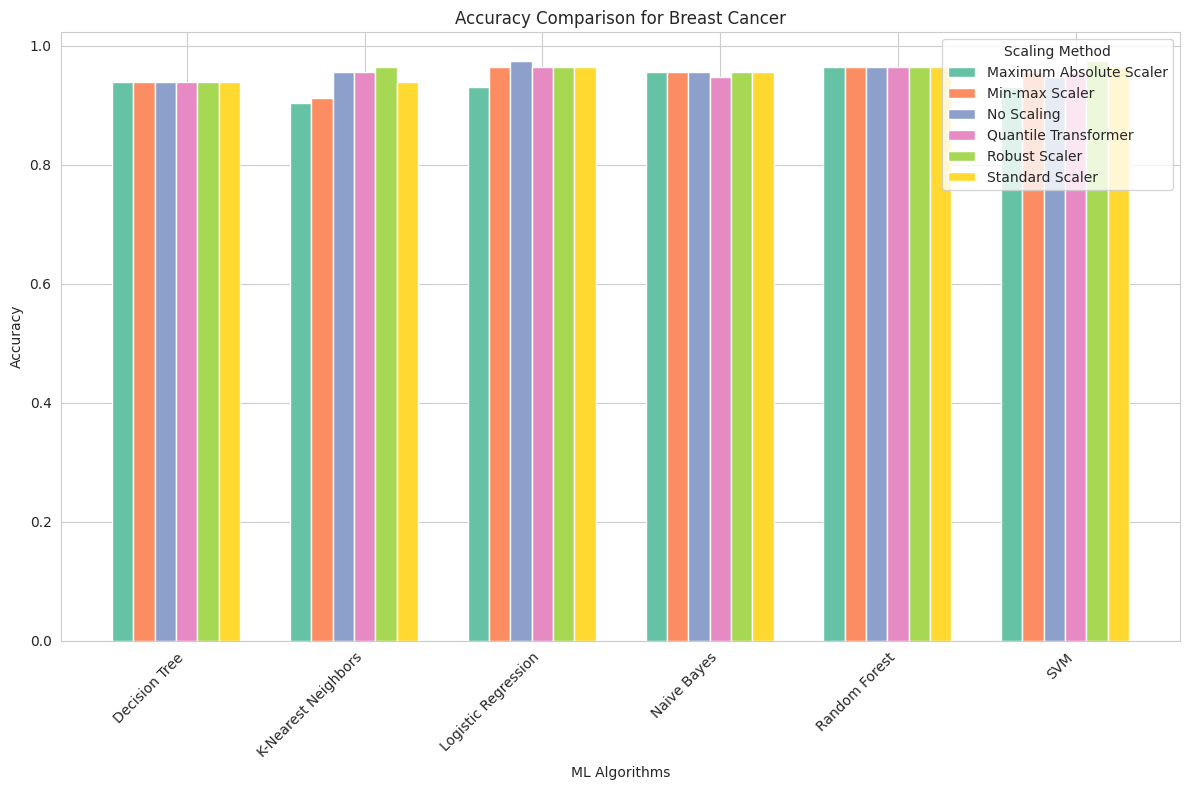

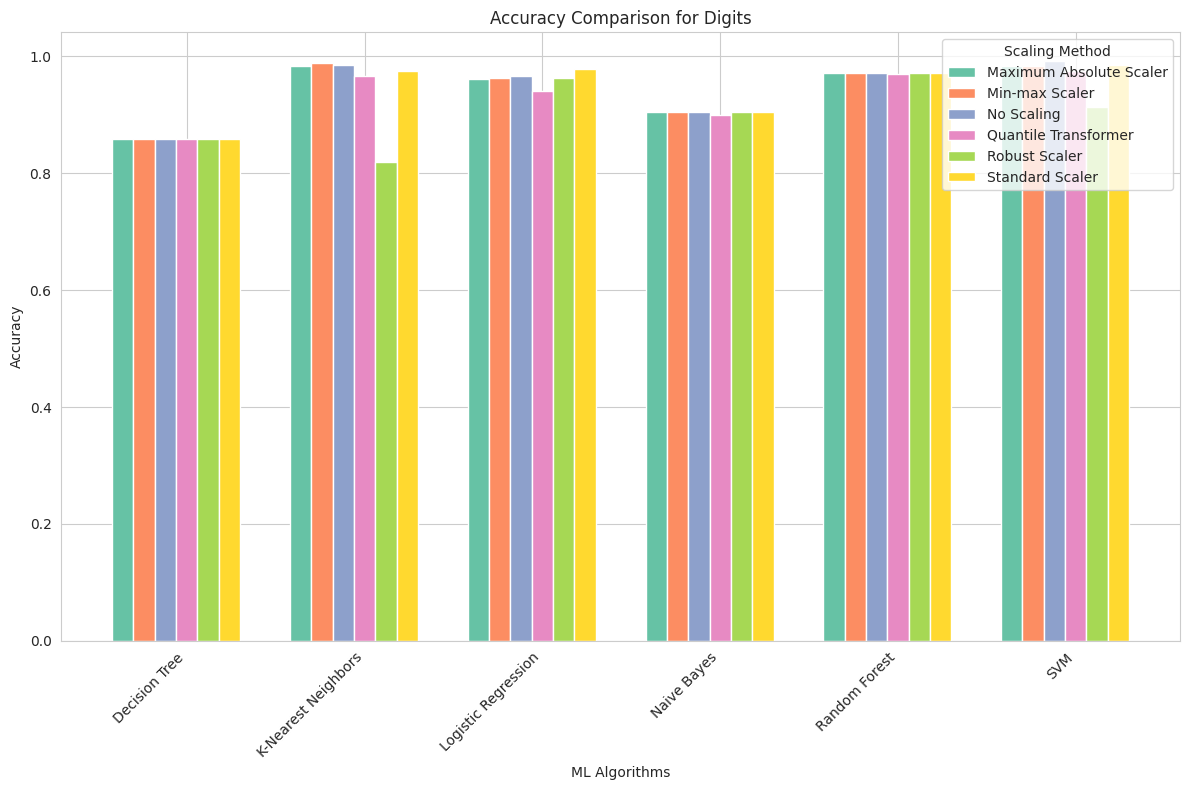

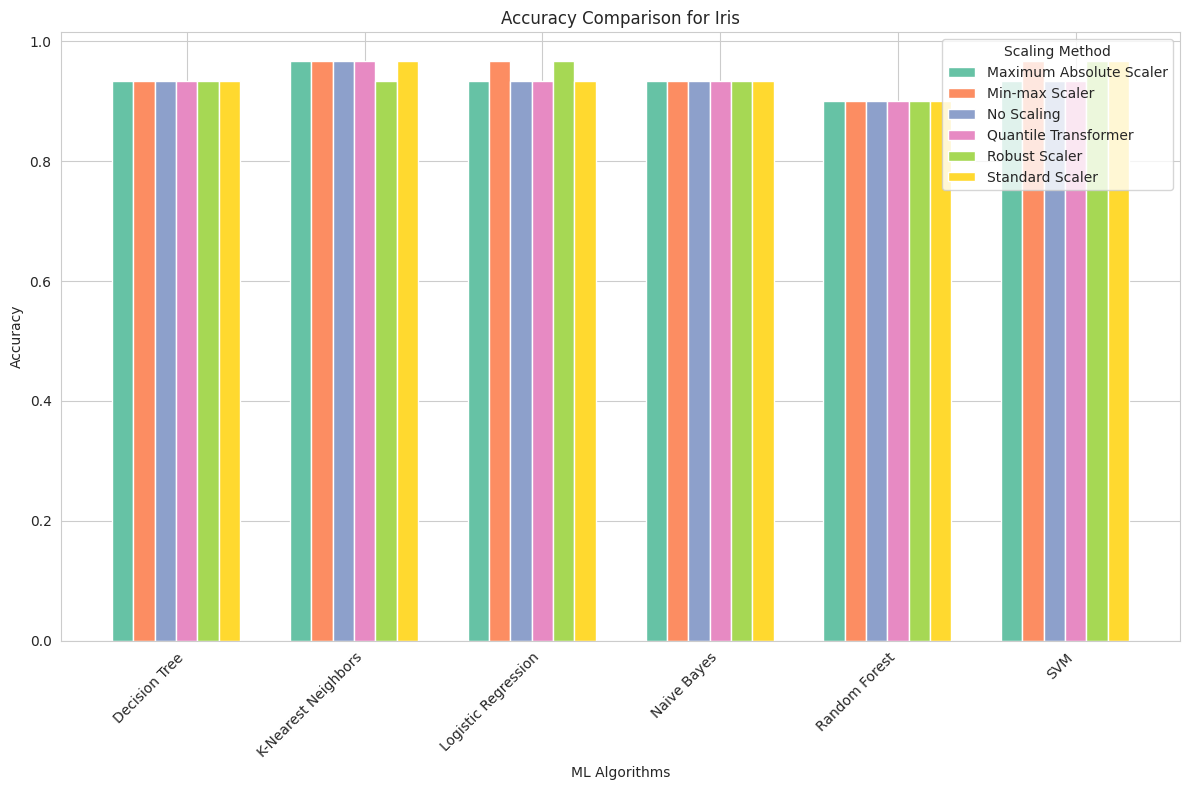

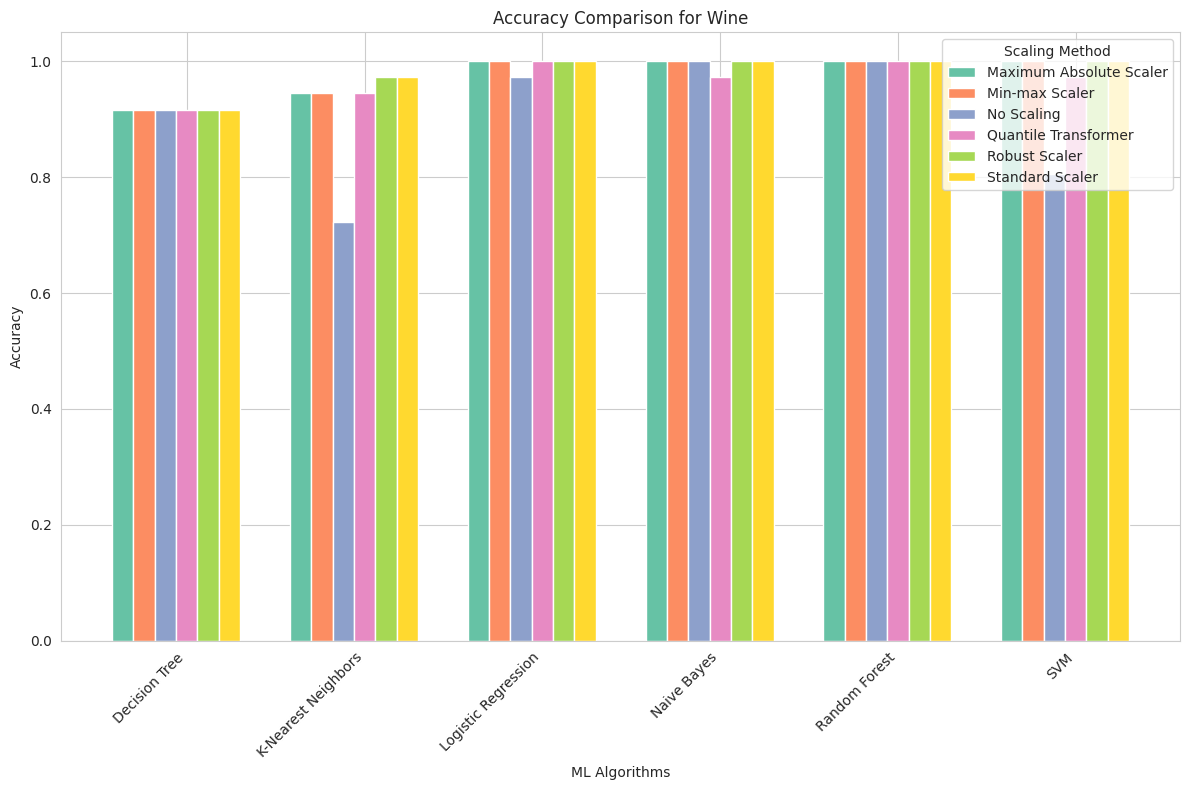

In [14]:
# Define a list of scaling methods and their Material Design colors
scaling_methods = results_pivoted_df['Scaling Method'].unique()
material_colors = sns.color_palette("Set2")
datasets = results_pivoted_df['Dataset'].unique()

# Set Seaborn style for a modern, beautiful look
sns.set_style("whitegrid")

# Create grouped bar charts for each dataset
for dataset in datasets:
    plt.figure(figsize=(12, 8))
    
    # Filter the data for the current dataset
    dataset_data = results_pivoted_df[results_pivoted_df['Dataset'] == dataset]
    
    # Define the x-axis labels (ML algorithms)
    ml_algorithms = dataset_data.columns[2:].tolist()
    
    bar_width = 0.12  # Width of each bar
    index = range(len(ml_algorithms))

    # Create a bar for each scaling method
    for i, method in enumerate(scaling_methods):
        try:
            accuracies = dataset_data[dataset_data['Scaling Method'] == method].values[0][2:]
            plt.bar([x + i * bar_width for x in index], accuracies, bar_width, label=method, color=material_colors[i])
        except IndexError:
            print(f"No data found for {method} in {dataset}")
    
    # Set the x-axis labels, title, and legend
    plt.xlabel('ML Algorithms')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Comparison for {dataset}')
    plt.xticks([x + bar_width * (len(scaling_methods) / 2) for x in index], ml_algorithms)
    plt.legend(scaling_methods, title='Scaling Method')

    # Adjust layout to prevent overlapping x-axis labels
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot or save it as an image
    plt.show()

### Evaluation of Results

The evaluation of results is based on the performance of six classification algorithms across different datasets and scaling methods. The accuracy scores are presented for Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, Naive Bayes, Random Forest, and Support Vector Machine (SVM). Here's an analysis of the findings:

#### Breast Cancer Dataset

*   **Maximum Absolute Scaler**: This scaling method produced competitive accuracy scores for all algorithms. Naive Bayes and Logistic Regression achieved the highest accuracy of approximately 95.6%, while other algorithms also performed well.
    
*   **Min-max Scaler**: Similar to the Maximum Absolute Scaler, this method yielded strong accuracy results across all algorithms, with Logistic Regression and SVM reaching the highest scores of 96.4% and 95.6%, respectively.
    
*   **No Scaling**: Surprisingly, this dataset demonstrated that some algorithms, particularly Naive Bayes and Logistic Regression, do not benefit from feature scaling. They achieved high accuracy without any scaling, indicating that the original feature values were suitable for these models.
    
*   **Quantile Transformer**: The Quantile Transformer showed consistent accuracy, with Logistic Regression and SVM achieving the highest scores of 96.4% and 95.6%, respectively.
    
*   **Robust Scaler**: Robust scaling led to competitive accuracy for most algorithms, with SVM achieving the highest accuracy of 97.4%.
    
*   **Standard Scaler**: Standard scaling demonstrated similar results to other scaling methods, with Logistic Regression and SVM achieving the highest accuracy of 96.4%.

#### Digits Dataset

*   **Maximum Absolute Scaler**: This scaling method had a positive impact on KNN, which achieved a high accuracy of approximately 98.3%. However, Decision Tree and Logistic Regression showed lower performance.
    
*   **Min-max Scaler**: Min-max scaling improved the accuracy of KNN to nearly 98.9%. Other algorithms also benefited from this scaling.
    
*   **No Scaling**: Surprisingly, the Digits dataset, particularly for KNN, demonstrated that feature scaling is not necessary for achieving high accuracy. KNN reached 99.2% accuracy without any scaling.
    
*   **Quantile Transformer**: While other algorithms performed well with this scaling method, Decision Tree and KNN showed slightly reduced accuracy.
    
*   **Robust Scaler**: Robust scaling did not benefit KNN, with its accuracy dropping to 81.9%. Other algorithms showed consistent performance.
    
*   **Standard Scaler**: Standard scaling improved the accuracy of KNN to 98.6%, making it one of the best-performing algorithms for this dataset.

#### Iris Dataset

*   **Maximum Absolute Scaler**: Scaling had minimal impact on the accuracy of algorithms for the Iris dataset. SVM achieved the highest accuracy of 96.7%, regardless of scaling.
    
*   **Min-max Scaler**: Similar to Maximum Absolute Scaling, min-max scaling had a limited effect on the accuracy of algorithms. SVM consistently achieved the highest accuracy of 96.7%.
    
*   **No Scaling**: The Iris dataset was naturally well-scaled, and most algorithms, particularly SVM, achieved high accuracy without any scaling.
    
*   **Quantile Transformer**: Scaling had little influence on accuracy. SVM remained the best-performing algorithm, with an accuracy of 96.7%.
    
*   **Robust Scaler**: Robust scaling slightly improved the accuracy of Decision Tree and SVM but had limited impact overall.
    
*   **Standard Scaler**: Standard scaling resulted in consistent accuracy for all algorithms, with SVM maintaining the highest accuracy of 96.7%.

#### Wine Dataset

*   **Maximum Absolute Scaler**: This scaling method had a substantial impact on SVM, boosting its accuracy to 100%. Other algorithms also reached high accuracy levels.
    
*   **Min-max Scaler**: Min-max scaling had a similar effect on SVM, resulting in perfect accuracy. Decision Tree, KNN, and Logistic Regression also reached maximum accuracy.
    
*   **No Scaling**: The Wine dataset revealed the significance of scaling, particularly for SVM. Without scaling, SVM's accuracy was relatively low at 80.6%, highlighting the sensitivity of SVM to feature values.
    
*   **Quantile Transformer**: Quantile transformation improved the accuracy of Decision Tree and Logistic Regression. However, SVM remained sensitive to scaling.
    
*   **Robust Scaler**: Robust scaling had a positive impact, with SVM reaching perfect accuracy. Other algorithms also performed well.
    
*   **Standard Scaler**: Standard scaling had a similar effect to other scaling methods, with SVM achieving perfect accuracy.

### Conclusion

In summary, the impact of feature scaling on machine learning algorithms varies depending on the dataset and the algorithm used:

*   Some datasets, like the Iris dataset, are naturally well-scaled, and most algorithms perform consistently well without any scaling.
    
*   Feature scaling, particularly min-max and maximum absolute scaling, has a positive impact on algorithms in datasets like Breast Cancer and Digits, resulting in improved accuracy.
    
*   The Wine dataset demonstrated that certain algorithms, notably SVM, are highly sensitive to feature scaling. Without proper scaling, SVM's performance can be significantly compromised.
    
*   Surprisingly, some algorithms, such as Naive Bayes and Logistic Regression, performed well without any scaling in the Breast Cancer dataset, indicating that the original feature values were suitable for these models.
    

In practice, it's essential to consider the characteristics of the dataset and the algorithm's sensitivity to feature values when deciding whether to apply feature scaling. While scaling can improve the performance of many machine learning algorithms, there are cases where it may not be necessary and could even have a negligible or detrimental effect on model accuracy.

## The Resilience of Naive Bayes and Tree-Based Algorithms to Scaling

In the context of our machine learning analysis, it's fascinating to observe that Naive Bayes and tree-based algorithms, such as Decision Trees and Random Forests, exhibit remarkable resilience to feature scaling. This resilience stems from the inherent characteristics of these algorithms and their method of decision-making.

### Naive Bayes Classifier

Naive Bayes is a probabilistic algorithm that's based on the Bayes' theorem. It operates under the "naive" assumption that features are conditionally independent, given the class label. This fundamental assumption simplifies the calculations and often leads to surprisingly good classification results, especially in text and categorical data analysis.

The reason why Naive Bayes remains largely unaffected by feature scaling is twofold:

1.  **Probabilistic Nature**: Naive Bayes calculates probabilities based on the distribution of features within each class. The relative scaling of individual features does not impact the probability ratios significantly. In other words, as long as the relationships between features and classes remain consistent, the algorithm can adapt to different feature scales.
    
2.  **Normalization in Probability Calculation**: When computing probabilities, Naive Bayes often involves normalizing terms. This means that even if feature values are on different scales, the normalization process effectively scales them down to a common scale during probability calculations.

### Decision Trees and Random Forests

Decision Trees and their ensemble counterpart, Random Forests, are non-parametric algorithms that make decisions by recursively splitting data based on feature values. They are highly interpretable and capable of capturing complex relationships within the data.

The key reasons why Decision Trees and Random Forests are generally insensitive to feature scaling include:

1.  **Splitting Criteria**: Decision Trees make decisions based on feature values relative to certain thresholds. The order or magnitude of these thresholds doesn't affect the decision-making process. The algorithm focuses on finding the most discriminative features and their optimal split points.
    
2.  **Ensemble Nature (Random Forests)**: Random Forests combine multiple Decision Trees. The ensemble nature of Random Forests further reduces sensitivity to feature scaling. When individual trees make errors due to scaling, the ensemble tends to compensate for them.
    
3.  **Impurity Measures**: Decision Trees use impurity measures like Gini impurity and entropy to determine the quality of a split. These measures are based on class proportions within a split and are independent of feature scales.